In [1]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')


<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Zero Padding and the DTFT

* **Course AIS2201 - Signalbehandling**
* **Week 38, 2025**
* **Lecturer: Kai Erik Hoff**


# Tema 

* Repetisjon DFT og IDFT
* Repetisjon Spektral Lekkasje
* Vindusfunksjoner 
* Zero Padding
* Analyse av vindusfunksjoner

## Recap: *spectral leakage*

Output()

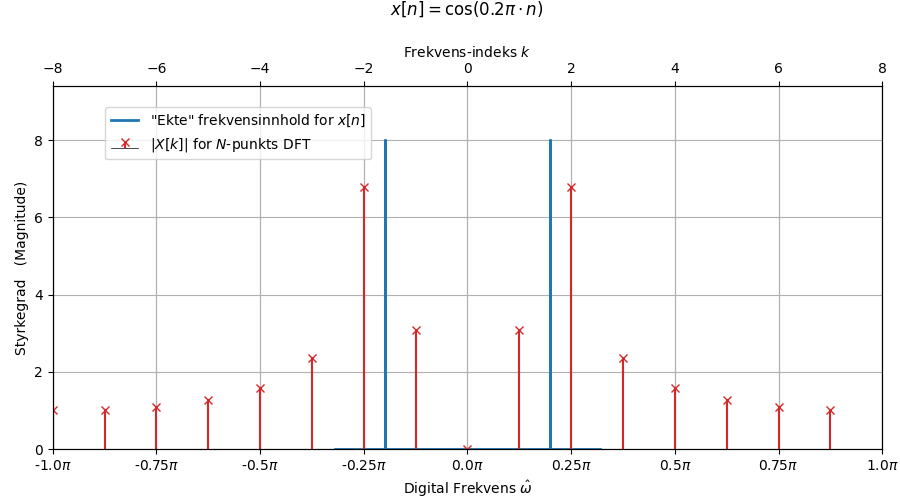

In [6]:
from demos import SpectralLeakageDemo
%matplotlib ipympl
SpectralLeakageDemo(figsize=(9,5)); # Figurstørrelsen kan endres for å tilpasse dokumentvisning.

## Recap: *windowing*

* A ***window function*** is a useful tool for limiting the effects of spectral leakage.
    * By manipulating the signal segment $x[n], n \in [0, N-1]$ *before* calculating the DFT, we can modify the frequency content towards a more accurate representation
    * The window function $w[n]$ will attribute specific weights to samples in the signal $x[n]$ according to sample number.
    * Truncates samples close to the edges of the window, in order to minimize the discontinuity between $x[N-1]$ and $x[0]$.

<img src="figures/Fig2_HannWindow.png" style="width: 70%; margin-left: 100px" />

# Spectral Analysis and Resolution Bandwidth (RBW)

* Frequency-domain resolution is determined by window length $N$
$$\Delta f = \frac{f_s}{N}$$

* One sample in $X[m]$ could indicate presence of any frequency $f \in \left(f_m - \frac{\Delta f}{2}, f_m + \frac{\Delta f}{2}\right)$

<img src="figures/frequency_bin.svg" style="width: 60%; margin-left: 100px" />


* Can we use information contained within the $N$ samples of our signal $x[n]$ to infer the frequency content between the points in $f_m$? 

# Zero padding


* Method of increasing number of data points in the frequency domain without increasing window length $N$

* The signal window is "padded" with a certain number of zero-values samples at it's end
    * If windowing is used, apply window ***before*** adding the zeroes.

<img src="figures/Fig3_ZeroPadding.jpg" style="width: 70%; margin-left: 100px" />

* DFT is calculated using the new extended signal as input

## Code example 1:

Given $N=20$ samples of a sinusoidal signal $x[n] = \cos\left( \frac{\pi}{4} \cdot n \right)$:

1. Use zero padding to double the number of points in the frequency domain where the DFT is calculated.
2. Use the extended DFT output to present a two-sided magnitude spectrum where the x-axis represents *normalized frequency $\hat{f}$*.

PS: Two functions of note from the [`numpy.fft`](https://numpy.org/doc/stable/reference/routines.fft.html) module: [`fftshift`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) and [`fftfreq`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html).

(Text(0.5, 0, 'Normalized frequency $\\hat{f}$ (cycles/sample)'),)

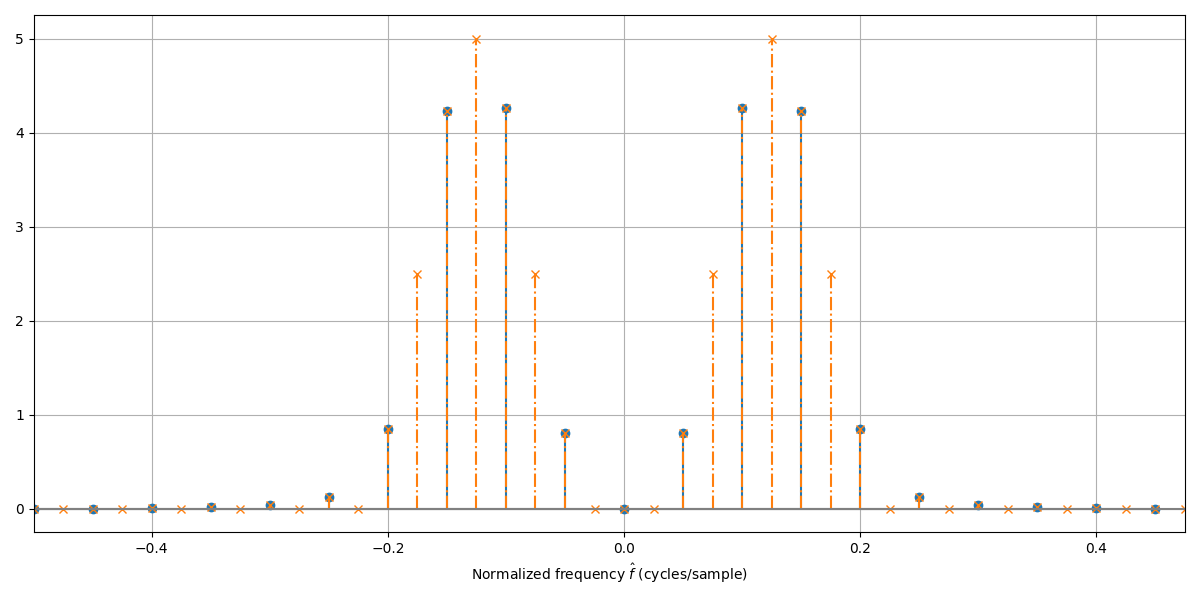

In [3]:
import scipy.signal as sig

N = 20
n = np.arange(N)
xn = cos(pi*0.25*n)

wn = 0.5 - 0.5*cos(2*pi*n/N)
xn_win = xn*wn

xn_padded = np.concatenate((xn_win, np.zeros(N)))
                           
Xm_win = np.fft.fft(xn_win)
Xm_win = np.fft.fftshift(Xm_win)
f = np.fft.fftfreq(len(Xm_win))
f = np.fft.fftshift(f)

Xm_pad = np.fft.fft(xn_padded)
Xm_pad = np.fft.fftshift(Xm_pad)
f2 = np.fft.fftfreq(len(Xm_pad))
f2 = np.fft.fftshift(f2)

plt.close(2); plt.figure(2, figsize=(12,6))
plt.stem(f, np.abs(Xm_win), markerfmt='oC0', linefmt='C0', basefmt='grey')
plt.stem(f2, np.abs(Xm_pad), markerfmt='xC1', linefmt='C1-.', basefmt='grey')
plt.xlabel(r'Normalized frequency $\hat{f}$ (cycles/sample)'),

## Quiz-question:
* Given the following parameters used in spectral analysis of a signal $x[n]$:
    * $f_s = 4000 \text{ samples/second}$ 
    * $N = 1000 \text{ samples}$
* How many zero-valued samples must we pad the segment with to achieve a resolution bandwidth $\Delta f = 1\text{ Hz}$?

# Using windowing and zero padding in python
DSP-oriented functions such as [`magnitude_spectrum`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.magnitude_spectrum.html) in the matplotlib module have optional parameters for both window functions and zero padding.

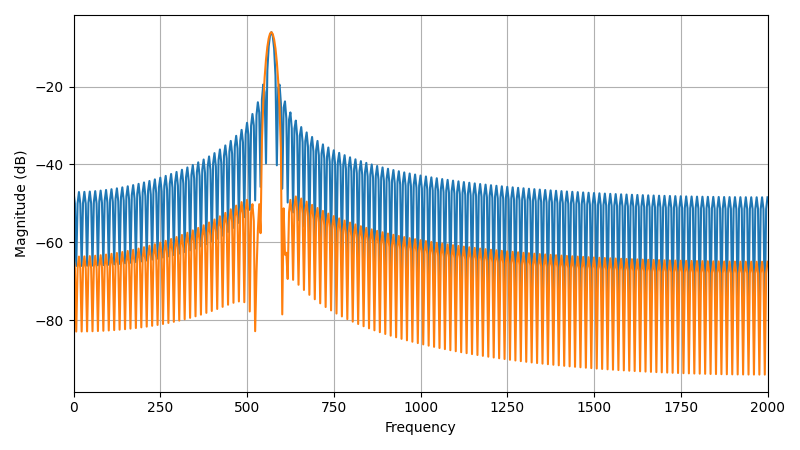

In [4]:
f = 570
f_s = 4000

N = 256
n = np.arange(N)

xn = cos(2*pi*f/f_s*n) 

plt.figure()
plt.magnitude_spectrum(xn, 
                       Fs=f_s, 
                       window = np.ones(N), # Rectangular Window
                       pad_to = 1024, # Segment length after zero padding
                       scale = 'dB'
                      );

plt.magnitude_spectrum(xn, 
                       Fs=f_s, 
                       window = np.hamming(N), # Rectangular Window
                       pad_to = 1024, # Segment length after zero padding
                       scale = 'dB'
                      );

# Key points on zero padding

* Increased resolution in DFT output.
    * Given a signal segment of lenght $N$ padded with $L$ zeroes, the resolution bandwidth (RBW) becomes:
$$\Delta f = \frac{f_s}{N + L}$$

* Zero padding does not add new information!
    * "fills in the gaps" by adding additional datapoints along some continuous function $X(\hat{\omega})$ in the frequency domain
    * The shape of $X(\hat{\omega})$ is determined by the information contained within the $N$ original samples of the signal $x[n]$

# The Discrete-Time Fourier Transform (DTFT)

* Finds a ***continusous function*** for the frequency content of a signal $x[n]$
    * **Complete** breakdown of spectral content, not only a finite number of samples.

<img src="figures/Fig4_DTFT1.png" style="width: 80%; margin-left: 100px" />

# The Discrete-Time Fourier Transform (DTFT)

* Formal Definition:
### $$X\left(\hat{\omega}\right) = \sum_{n=0}^{\infty} x[n]\cdot e^{-j\hat{\omega}\cdot n}$$

* $X\left(\hat{\omega}\right)$ is *continuous* function.
    * Input is the signal $x[n]$ in it's entirety.
    * Assumes input signal $x[n]$ can be described mathematiclly for all $n \in \mathbb{Z}$-



* Same guiding principle as DFT, Fourier Series etc...
    * Use complex downconversion to provoke a constant term, the sum/integrate to calculate constant term

* DFT converges with DTFT as zero padding length $L \rightarrow \infty$

## Code example: DTFT of sinusoidal signal segment

* Use Python to plot the DTFT of:
$$x[n] = \begin{cases} \cos\left(\frac{\pi}{4}\cdot n \right), & n \in [0, N) \\ 0, & \text{otherwise} \end{cases}$$



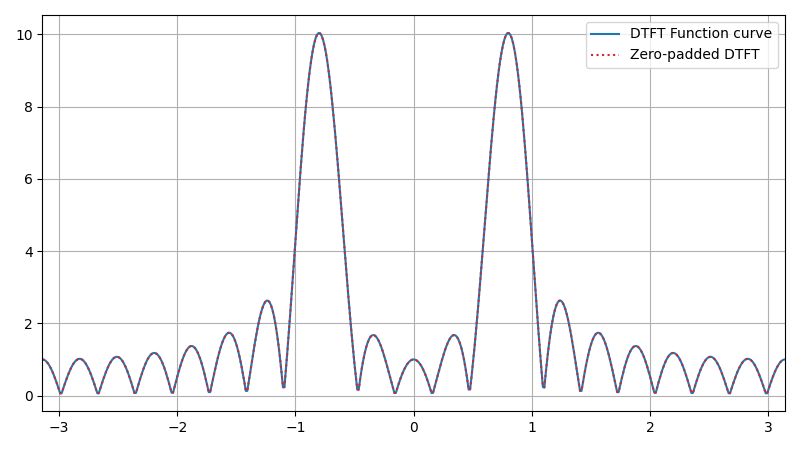

In [5]:
import scipy.signal as sig

N = 20
n = np.arange(N)
xn = cos(pi*0.25*n)

# Function for the DFT of signal
def X(omega):
    return np.sum(xn*np.exp(-1j*omega*n))

omega = np.linspace(-np.pi, np.pi, 500+1)

plt.figure()
plt.plot(omega, np.abs([X(omega_m) for omega_m in omega]), label = "DTFT Function curve")

Xm = np.fft.fftshift(np.fft.fft(xn, n=500))
wm = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(500))
plt.plot(wm, np.abs(Xm), 'C3:', label = "Zero-padded DTFT")
plt.legend()

# Inverse DTFT
* Definition:
$$ x[n] = \frac{1}{2\pi} \int_{-\pi}^{\pi}X\left(\hat{\omega}\right)\cdot e^{j\hat{\omega}\cdot n}$$



* Due to $X\left(\hat{\omega}\right)$ being *continuous*, an *integral* is needed to transform back to the time domain.
    * Scales by $\frac{1}{2\pi}$ as that is the full width of the two-sided frequency spectrum $\hat{\omega} \in [-\pi, \pi]$


* Not something we will focus on calculating in this course.

# Questions?